In [8]:
import pandas as pd
import numpy as np


In [6]:
#load the dataset 
file_path = r'C:\Users\Noush\Downloads\merged_data.xlsx'

In [9]:
df = pd.read_excel(file_path)
df

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value
0,Asia,Western Asia,Turkey,6.89,6.40,7.0,9.0,9.0,4.0,3.0,...,6.5,2.0,4.0,4.0,3.5,3.5,2021,US$,9661.23,TUR
1,Africa,West Africa,Cabo Verde,4.04,3.70,4.5,2.0,2.5,2.5,4.0,...,7.5,5.0,6.0,3.5,6.0,7.0,2021,US$,3293.23,CPV
2,Africa,Southern Africa,South Africa,6.63,6.00,4.5,4.0,8.0,3.5,7.5,...,6.0,6.0,6.0,4.0,5.0,7.0,2021,US$,7055.06,ZAF
3,South America,South America,Colombia,7.66,7.20,7.5,7.0,8.0,6.0,7.0,...,4.5,6.0,5.0,3.5,4.5,6.5,2021,US$,6104.14,COL
4,South America,South America,Peru,6.35,6.20,7.0,6.0,5.5,7.0,5.5,...,5.0,4.5,4.0,3.5,3.0,4.5,2021,US$,6621.65,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,Caribbean,Jamaica,5.91,4.20,5.0,3.0,8.5,1.5,2.0,...,6.5,4.5,4.5,5.0,6.0,6.5,2021,US$,5183.58,JAM
189,North America,Caribbean,St. Vincent and the Grenadines,3.30,2.85,2.5,1.0,4.0,1.0,2.0,...,6.0,5.5,4.0,3.0,6.0,6.0,2021,US$,8440.03,VCT
190,Europe,Central & Eastern Europe,Slovenia,4.29,3.95,4.0,5.5,3.5,2.0,3.0,...,7.5,6.5,5.0,6.0,6.0,6.0,2021,US$,29134.80,SVN
191,North America,Caribbean,St. Lucia,4.09,3.05,4.0,1.5,5.0,2.0,1.0,...,5.5,4.0,5.5,5.0,6.0,4.0,2021,US$,9824.06,LCA


In [22]:
#check missing cells
missing_values= df.isnull().sum()
print("Missing values in each column:\n",missing_values)


Missing values in each column:
 Continent                                     0
Region                                        0
Country                                       0
Criminality                                   0
Criminal markets                              0
Human trafficking                             0
Human smuggling                               0
Arms trafficking                              0
Flora crimes                                  0
Fauna crimes                                  0
Non-renewable resource crimes                 0
Heroin trade                                  0
Cocaine trade                                 0
Cannabis trade                                0
Synthetic drug trade                          0
Criminal actors                               0
Mafia-style groups                            0
Criminal networks                             0
State-embedded actors                         0
Foreign actors                                0
Resilien

In [1]:
import matplotlib.pyplot as plt

In [20]:
#rename column 
df.rename(columns={'GDP Per Capita (US$)': 'GDP_Per_Capita'}, inplace=True)

Correlation coefficient between GDP per capita and the overall organized crime index: -0.34861436812767693


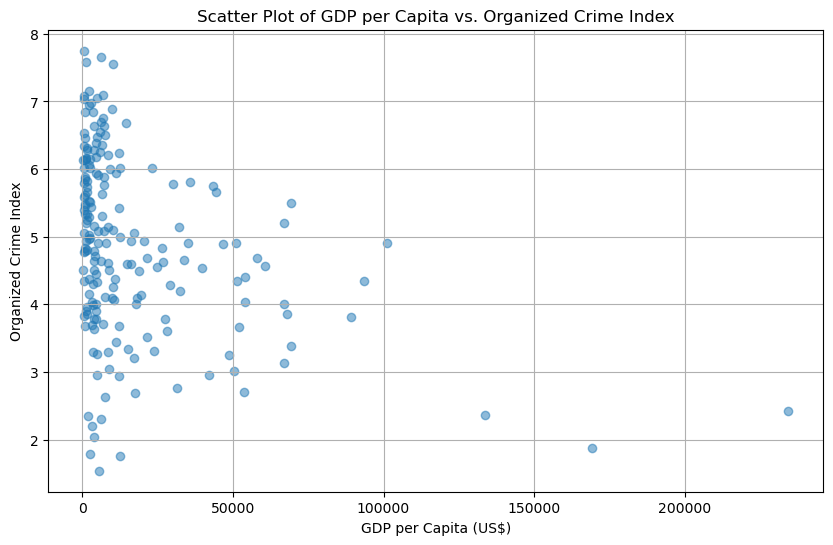

In [25]:
# Calculate the correlation coefficient
correlation = df['GDP_Per_Capita'].corr(df['Criminality'])
print("Correlation coefficient between GDP per capita and the overall organized crime index:", correlation)

# Scatter plot to visualize the relationship
plt.figure(figsize=(10,6))
plt.scatter(df['GDP_Per_Capita'], df['Criminality'], alpha=0.5)
plt.title('Scatter Plot of GDP per Capita vs. Organized Crime Index')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Organized Crime Index')
plt.grid(True)
plt.show()




In [26]:
import seaborn as sns

In [30]:
# Grouping data by 'Continent' to analyze regional differences

regional_group = df.groupby('Continent'). agg({'GDP_Per_Capita':'mean', 'Criminality':'mean'}).reset_index()


In [31]:
# Select numerical columns for descriptive statistics
numerical_cols = df.select_dtypes(include=[np.number])
print("Descriptive Statistics for Numerical Data:")
print(numerical_cols.describe())

Descriptive Statistics for Numerical Data:
       Criminality  Criminal markets  Human trafficking  Human smuggling  \
count   193.000000        193.000000         193.000000        193.00000   
mean      4.872383          4.650777           5.582902          4.76943   
std       1.326322          1.272582           1.679648          1.91416   
min       1.540000          1.600000           1.500000          1.00000   
25%       4.000000          3.850000           4.500000          3.00000   
50%       4.900000          4.750000           5.500000          5.00000   
75%       5.890000          5.650000           7.000000          6.50000   
max       7.750000          8.000000           9.500000          9.50000   

       Arms trafficking  Flora crimes  Fauna crimes  \
count        193.000000    193.000000    193.000000   
mean           4.919689      3.878238      4.634715   
std            2.105307      2.315469      1.921639   
min            1.000000      1.000000      1.000000 

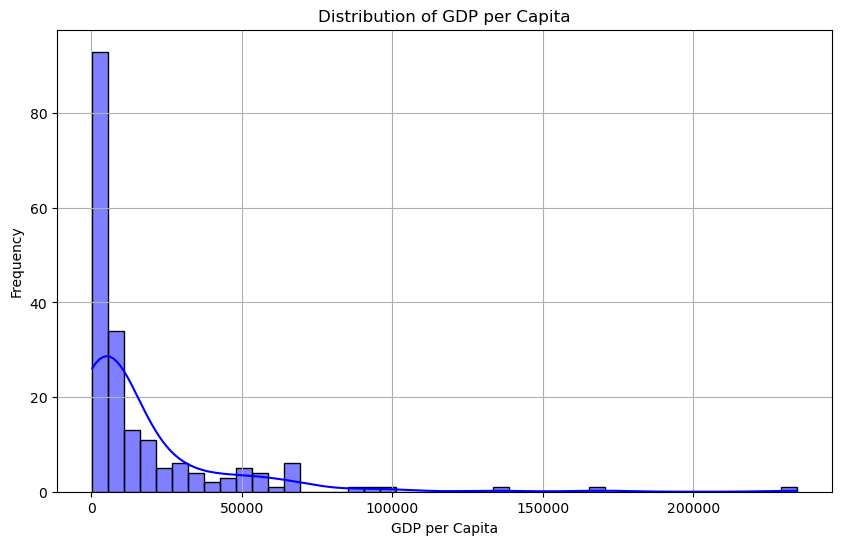

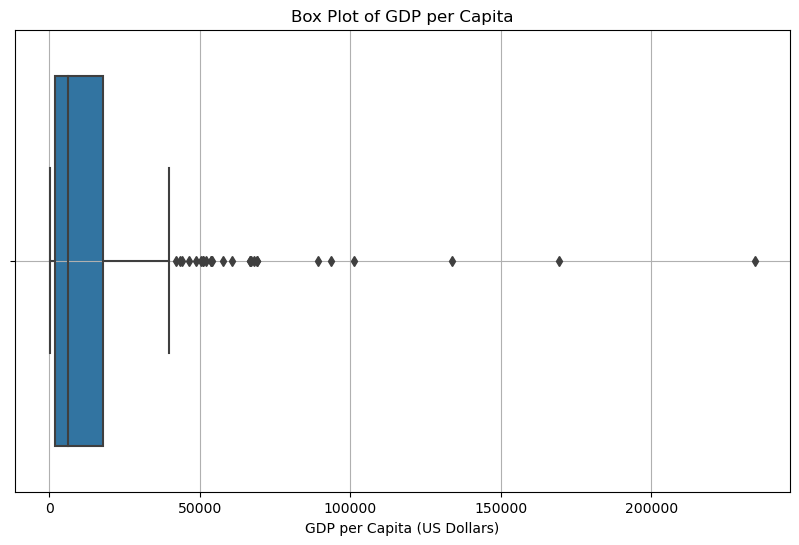

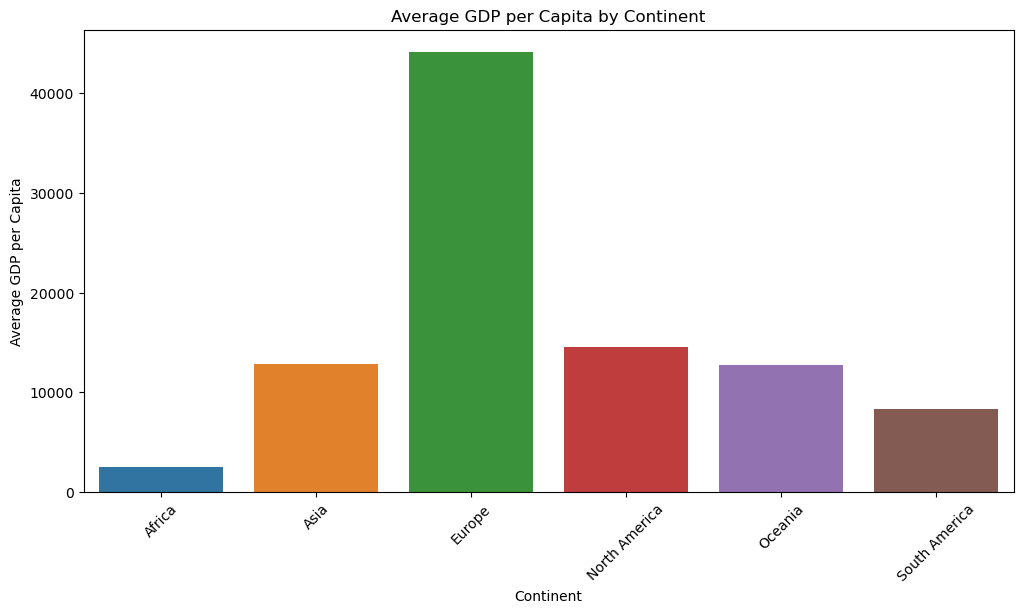

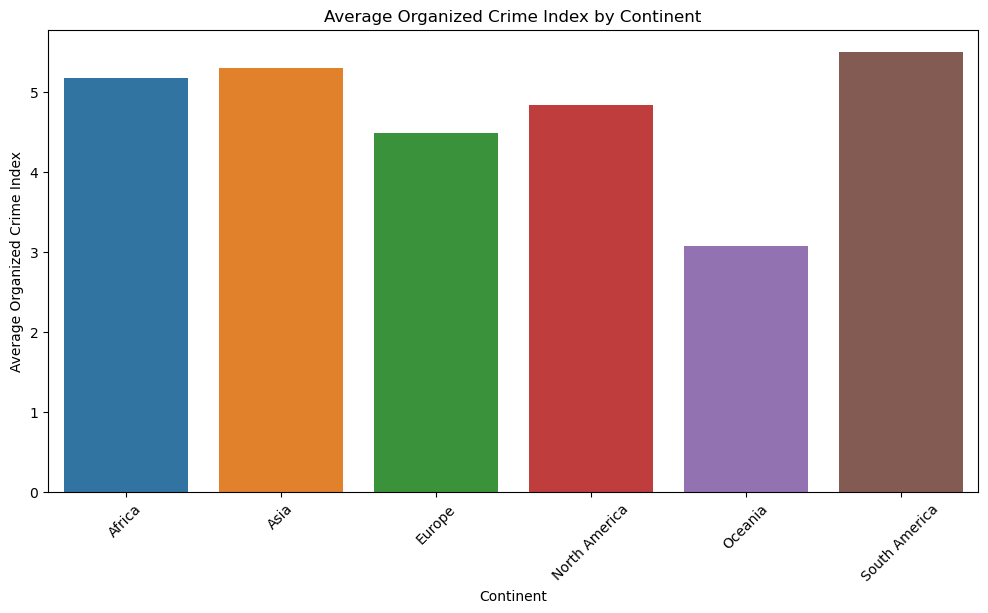

In [40]:
# Visualizing the distribution of GDP per Capita

plt.figure(figsize=(10, 6))
sns.histplot(df['GDP_Per_Capita'], kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for GDP per Capita to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GDP_Per_Capita'])
plt.title('Box Plot of GDP per Capita')
plt.xlabel('GDP per Capita (US Dollars)')
plt.grid(True)
plt.show()

# Visualizing the average GDP per capita and Criminality by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='GDP_Per_Capita', data=regional_group)
plt.title('Average GDP per Capita by Continent')
plt.ylabel('Average GDP per Capita')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Criminality', data=regional_group)
plt.title('Average Organized Crime Index by Continent')
plt.ylabel('Average Organized Crime Index')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()



In [51]:
# Calculating correlation within each continent

continents = df['Continent'].unique()
for continent in continents:
    subset = df[df['Continent'] == continent]
    correlation = subset['GDP_Per_Capita'].corr(subset['Criminality'])
    print(f"Correlation between GDP per capita and organized crime in {continent}: {correlation:.2f}")

Correlation between GDP per capita and organized crime in Asia: -0.33
Correlation between GDP per capita and organized crime in Africa: -0.30
Correlation between GDP per capita and organized crime in South America: -0.64
Correlation between GDP per capita and organized crime in North America: -0.18
Correlation between GDP per capita and organized crime in Europe: -0.65
Correlation between GDP per capita and organized crime in Oceania: 0.17


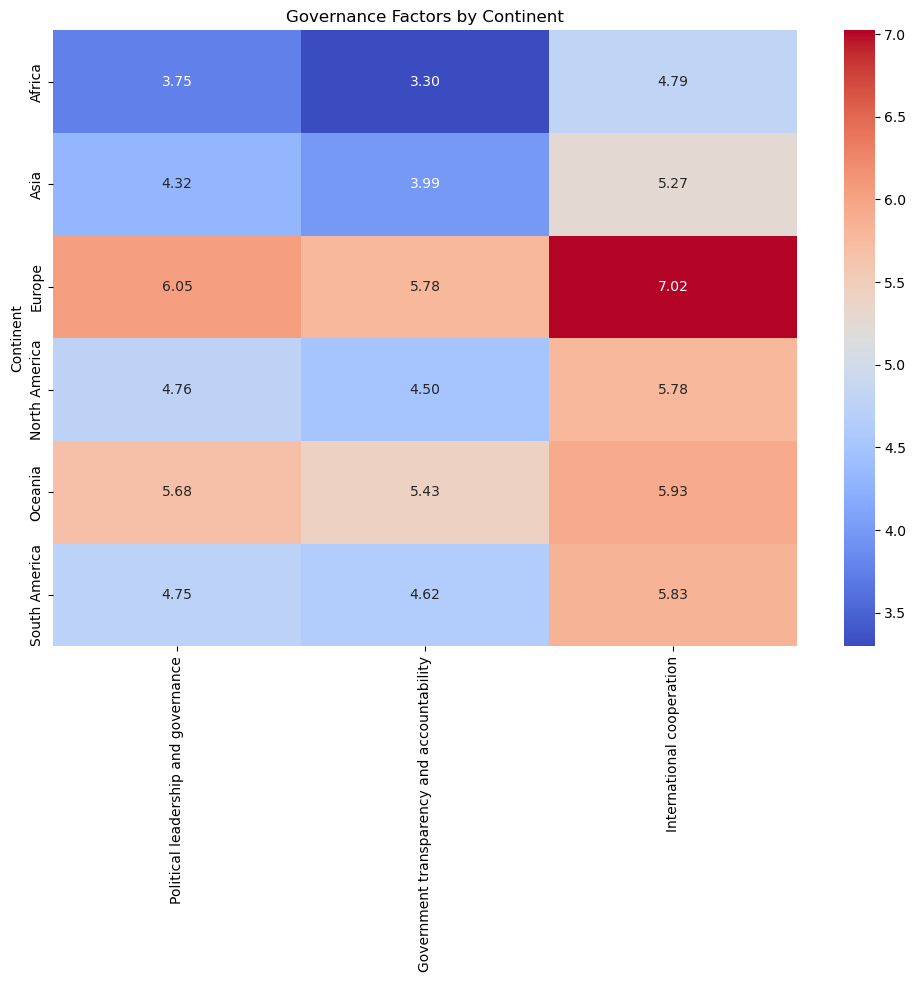

In [55]:
# Exploring governance factors by continent
governance_factors = ['Political leadership and governance', 'Government transparency and accountability', 'International cooperation']
continent_governance = df.groupby('Continent')[governance_factors].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(continent_governance.set_index('Continent'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Governance Factors by Continent')
plt.show()

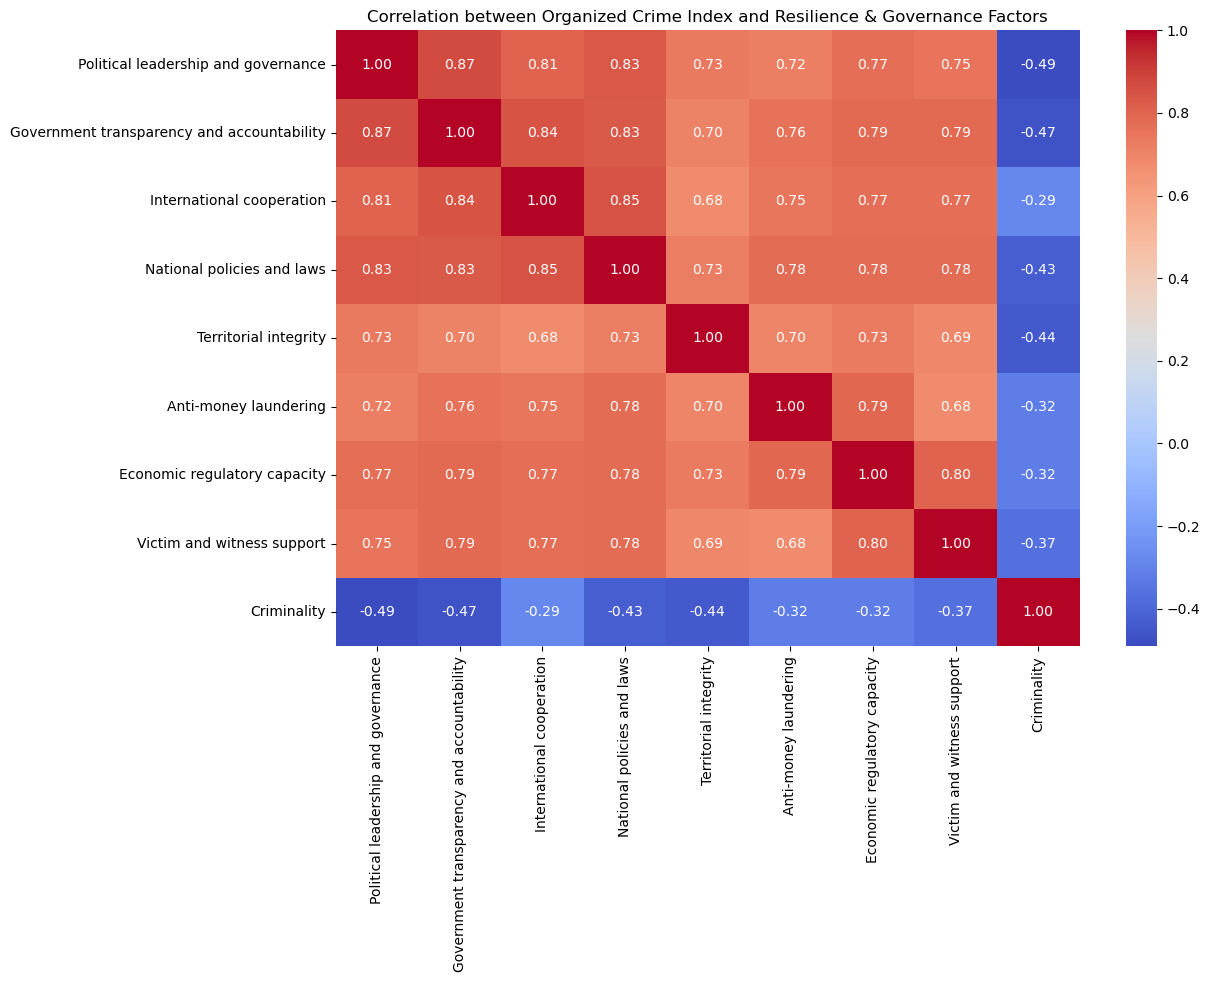

Correlation coefficients between organized crime index and resilience & governance factors:
International cooperation                    -0.286804
Anti-money laundering                        -0.319440
Economic regulatory capacity                 -0.320645
Victim and witness support                   -0.367162
National policies and laws                   -0.432648
Territorial integrity                        -0.441328
Government transparency and accountability   -0.467097
Political leadership and governance          -0.490887
Name: Criminality, dtype: float64


In [56]:
# Correctly select columns related to resilience and governance factors
resilience_governance_columns = df.columns[df.columns.str.contains('leadership|transparency|cooperation|policies|judicial|law enforcement|territorial|integrity|money laundering|regulatory|support|prevention')]

# Filter the DataFrame to include only numeric columns for correlation calculation
numeric_df = df[resilience_governance_columns].select_dtypes(include=[np.number])

# Calculate the correlation matrix for resilience and governance factors with the organized crime index
correlation_matrix = numeric_df.join(df['Criminality']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Organized Crime Index and Resilience & Governance Factors')
plt.show()
# Analyze the impact of resilience and governance factors on organized crime
print("Correlation coefficients between organized crime index and resilience & governance factors:")
print(correlation_matrix['Criminality'].drop('Criminality').sort_values(ascending=False))